# Classification

<style>body {text-align: justify}</style>

## What is Classification

Classification consists in taking a vector of inputs X to produce a vector of outputs Y that will associate each input x to a class. The training data set is composed of the vector X of n observations (that can include d parameters), and Y the vector the associated true values. Dataset in the case of *supervised* machine learning : $ \mathcal{D} = \{(X_1,Y_1), ... ,(X_n,Y_n) \} \in \mathcal{X}^n, \mathcal{Y}^n $.

The classification algorithm will try to minimize a loss function in order to create a model that can predict the class of each entry with a certain level of precision. During the training phase, the true output is already defined and is given to the algorithm so it can learn how to differenciate those classes. Once the model is trained, it is supposed to be able to correctly predict those output for new values.

An example of classification could be to predict the added value of a new client : small, average, important. The input could include the type of client (individual or company), the location of the store in which they made their first purchase, the amount of their first purchase, the day of the week... The model will transform the input vector in a value corresponding to one of the classes. During the training phase, you should take data that already exists. 

## How does a classification model work? 

Once the data is correclty collected, cleaned and formated, you can proceed to develop and train a classification model. There are several algorithm that will help you to do this task. However, it is important to understand how they work under the hood, and the right way to use them.

### The loss function

As specified in the graphs above, one of the main part of the training process consist in comparing the predicted values to the true output. For a classification problem, this comparison is done by a loss function that can be defined as : 

$$
\mathcal{l}(Y,f(X)) = \sum_{i=1}^{n} 1_{Y_i \ne f(X_i)}
$$

$1_{Y_i \ne f(X_i)}$ is equal to $1$ when $Y_i \ne prediction$. Therefore, for each mistake that the model makes, the loss function is incremented of one unit. A model that correctly predicts every observation has a loss of 0, and a model that is always wrong has a loss equal to the number of entries in the dataset. We aim a finding a function $f$ such that $\mathcal{l}(Y,f(X))$ gets as close as possible to 0. 

Here is a simple example of a classification model : 

### 1. Training the model 
<center>
<img src="pictures/classificationTraining.png">
</center>

### 2. Predict new values 
<center>
<img src="./pictures/classificationPredictions.png">
</center>

### What are the mains challenges 

As classification greatly depends on the quality of the input, therefore the first challenge we encounter is to feed the model with the proper data and the right amount of information. Indeed, giving too much information to the model can lead to over-fitting, especially if the information is not independ. It will also take more time to train the model and to get precise results. On the other hand, by not giving enough data to the model, you won't be able to train it correctly and it will never reach a correct level of precision. 

## How to implement classification with python :

In this example, I will import the necessary packages as we go. This is supposed to help you understand in which situation and part of the process the different packages are useful. However, in reality, a good practice is to import all the packages in the first cell of the notebook. 


### Load the data 

Pandas and numpy are the main packages used for loading/creating data sets. However, in a real case scenario, you might need a specific package to access a data base (boto3, sql...) or to do data transformation. Then, download the data set : https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/download?datasetVersionNumber=1 and unzip the file and load it in python with pandas.

Once the dataset has correctly been loaded, it is necessary to spend time analysing it and manipulating the data in order to get a deep understanding of what is at stake. The previous chapter deals with how to clean and visualize the data. Here, the dataset is already clean enough and well structured for us to do a classification. Therefore, it is possible to start working on it directly. 

```python
import pandas as pd 
import numpy as np 

train = pd.read_csv("../datasets/trees/train.csv")
test = pd.read_csv("../datasets/trees/test.csv")

train.head()
```

In [1]:
import pandas as pd 
import numpy as np 

train = pd.read_csv("../datasets/trees/train.csv")
test = pd.read_csv("../datasets/trees/test.csv")

train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['Cover_Type','Id']), train.Cover_Type, test_size=0.2)
le = LabelEncoder()
y_train_encode = le.fit_transform(y_train)
y_test_encode = le.transform(y_test)

### XGBoost Classifier 

XGBoost is one of the most popular and powerfull tool for datascience. 

In [3]:
import xgboost as xgb

XGBClassifier = xgb.XGBClassifier()
XGBClassifier.fit(X_train, y_train_encode)

output_train = XGBClassifier.predict(X_train)
output_test = XGBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')

The accuracy on the train set is equal to 98.8%
The accuracy on the test set is equal to 86.6%


```python
param_grid = {"max_depth":    [4,5,8,9],
              "n_estimators": [50,100,200],
              "learning_rate": [0.05,0.1]}

search = GridSearchCV(XGBClassifier, param_grid, cv=5,verbose=1).fit(X_train, y_train_encode)

print("The best hyperparameters are ",search.best_params_)
````

```python
bestXGBClassifier = xgb.XGBClassifier(learning_rate= 0.2, max_depth= 9, n_estimators= 300,reg_alpha=1 ) 
bestXGBClassifier.fit(X_train, y_train_encode)

output_train = bestXGBClassifier.predict(X_train)
output_test = bestXGBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')

bestXGBClassifier.save_model("bestXGBClassifier.txt")
```

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

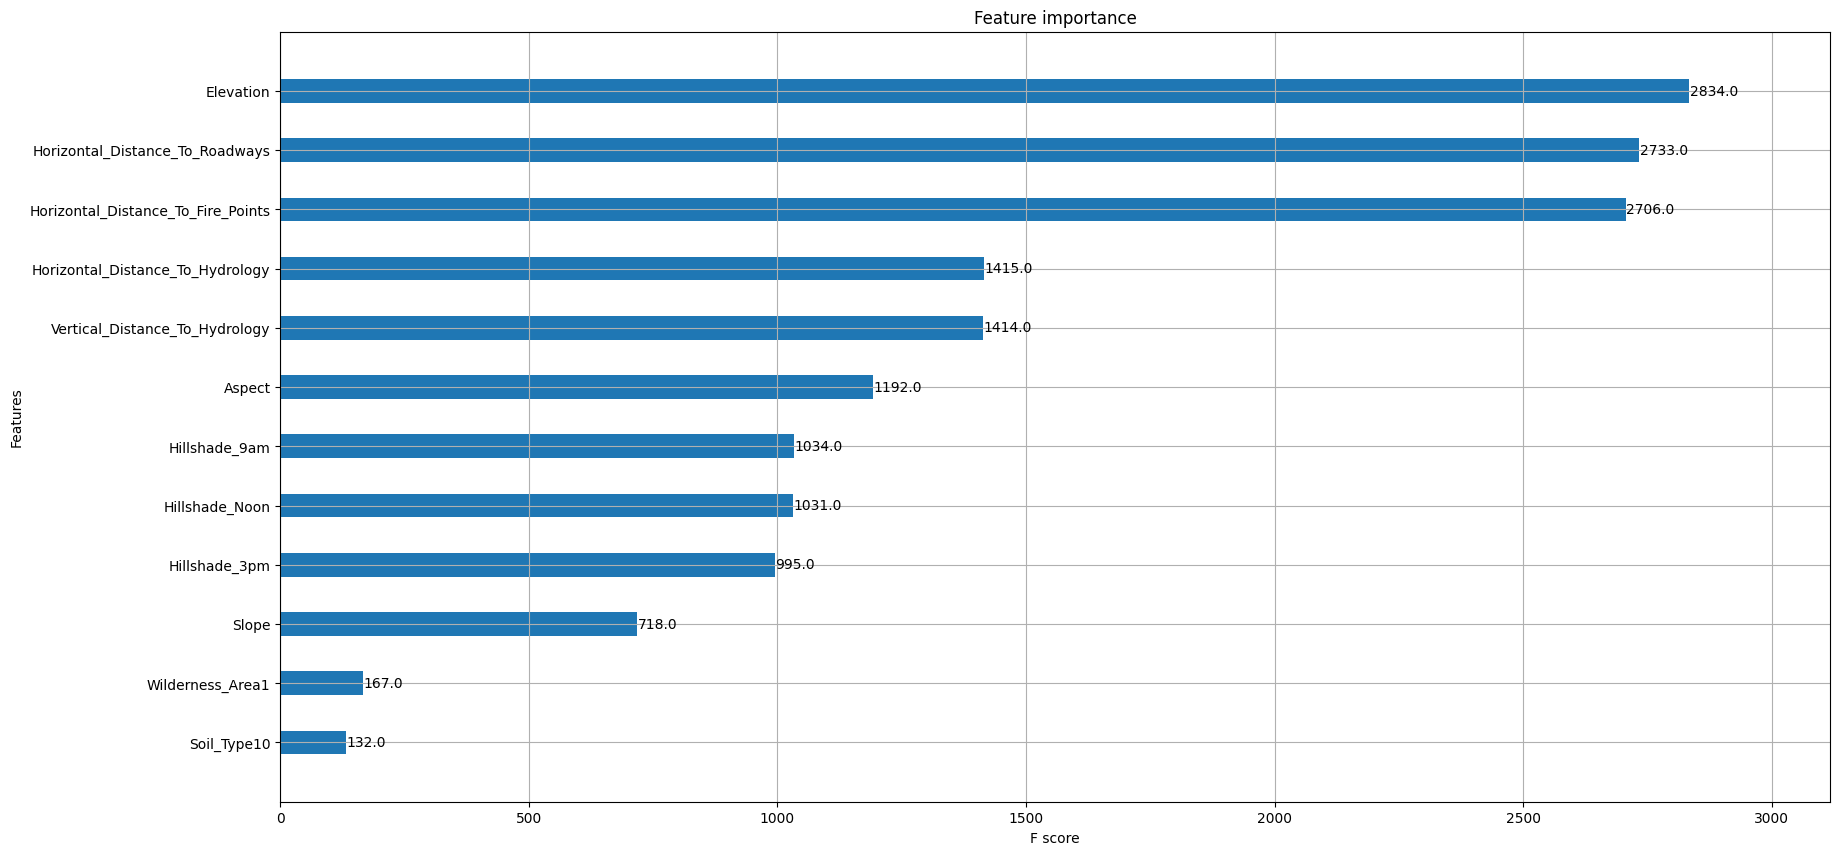

In [4]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,1,figsize=(20,10))
xgb.plot_importance(XGBClassifier, ax = ax, height=0.4,max_num_features =12)


In [5]:
Cover_Type = XGBClassifier.predict(test.drop(columns=["Id"]))
predictions = pd.DataFrame({"Id":test.Id,"Cover_Type":Cover_Type})
predictions["Cover_Type"] = le.inverse_transform(predictions["Cover_Type"])
#predictions.to_csv("data/XGBClassifierPredictions.csv",index=False)
predictions

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,5
4,5,5
...,...,...
581007,581008,3
581008,581009,3
581009,581010,3
581010,581011,3


### CatBoost Classifier 

CatBoost is one of the most popular and powerfull tool for datascience. 

In [6]:
from catboost import CatBoostClassifier
CATBClassifier = CatBoostClassifier(silent=True)
CATBClassifier.fit(X_train, y_train_encode)

output_train = CATBClassifier.predict(X_train)
output_test = CATBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')

The accuracy on the train set is equal to 94.3%
The accuracy on the test set is equal to 86.5%


Text(0.5, 1.0, 'Feature Importance')

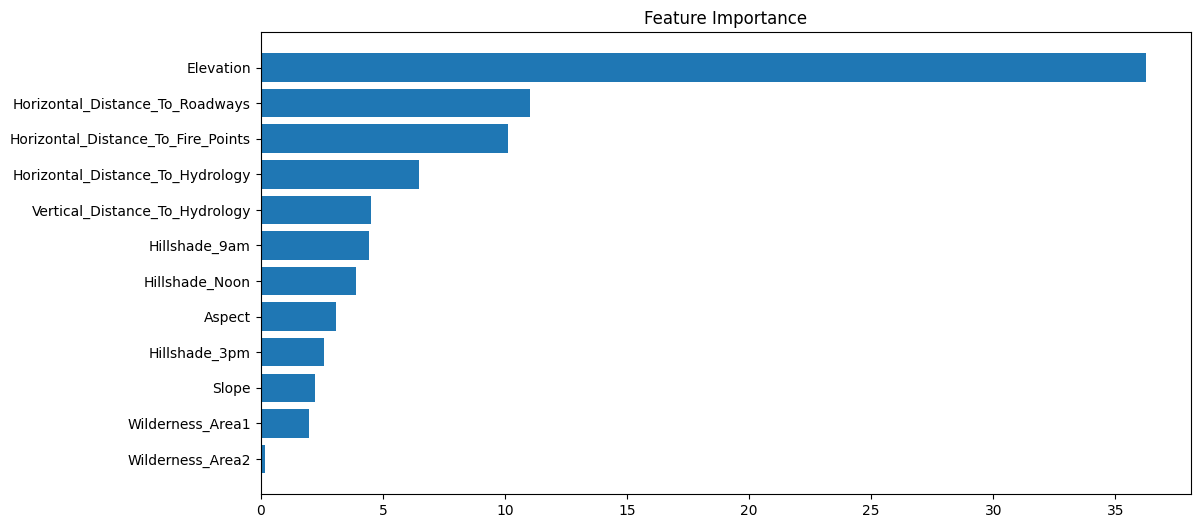

In [7]:
feature_importance = CATBClassifier.feature_importances_[:12]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

```python
param_grid = {"random_strength":[3,4],
              "l2_leaf_reg":[3,4],
              "max_depth":[10,11],
              "learning_rate":[0.17,0.23]}

search = GridSearchCV(CATBClassifier , param_grid, cv=3, verbose=3).fit(X_train, y_train_encode)

print("The best hyperparameters are ",search.best_params_)
BestCATBClassifier = CatBoostClassifier(learning_rate= 0.2, max_depth= 10,l2_leaf_reg= 3, random_strength= 3,silent=True)
BestCATBClassifier.fit(X_train, y_train_encode)

output_train = BestCATBClassifier.predict(X_train)
output_test = BestCATBClassifier.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')
```